In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
c= requests.get("https://api.bcb.gov.br/dados/serie/bcdata.sgs.4448/dados?formato=json").content
data = json.loads(c)

In [3]:
df = pd.DataFrame.from_dict(data)
df.reset_index(inplace=True)
df["valor"] = pd.to_numeric(df["valor"], downcast="float")
df.head()

,index,data,valor
0,0,01/01/1992,26.180000
1,1,01/02/1992,22.400000
2,2,01/03/1992,21.250000
3,3,01/04/1992,18.959999
4,4,01/05/1992,25.520000


In [13]:
for i in df["index"]:
  if df["index"][i]>0:
    df["Variação"][i]=(df["valor"][i]/df["valor"][i-1])-1
df.head()    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in float_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,index,data,valor,Variação
0,0,01/01/1992,26.180000,NaN
1,1,01/02/1992,22.400000,-0.144385
2,2,01/03/1992,21.250000,-0.051339
3,3,01/04/1992,18.959999,-0.107765
4,4,01/05/1992,25.520000,0.345992


In [6]:
df["Variação"]=df['valor'].pct_change(fill_method='ffill')
df.head()

,index,data,valor,Variação
0,0,01/01/1992,26.180000,NaN
1,1,01/02/1992,22.400000,-0.144385
2,2,01/03/1992,21.250000,-0.051339
3,3,01/04/1992,18.959999,-0.107765
4,4,01/05/1992,25.520000,0.345992


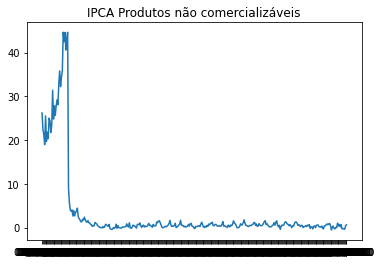

In [8]:
plt.plot(df["data"],df["valor"])
plt.title('IPCA Produtos não comercializáveis')
plt.show()

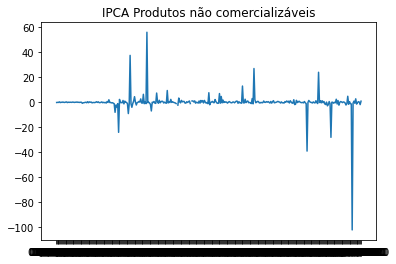

In [14]:
plt.plot(df["data"],df["Variação"])
plt.title('IPCA Produtos não comercializáveis')
plt.show()